In [1]:
import h5py
import ROOT
import numpy as np
import pandas as pd
import os

Welcome to JupyROOT 6.26/04


In [2]:
#Extracting data
f1= h5py.File('dataset/user.alfroch.26622668._000001.output.h5', "a")
f2= h5py.File('dataset/user.alfroch.26622668._000002.output.h5', "a")
f13= h5py.File('dataset/user.alfroch.26622668._000013.output.h5', "a")
f26= h5py.File('dataset/user.alfroch.26622668._000026.output.h5', "a")
f67= h5py.File('dataset/user.alfroch.26622668._000067.output.h5', "a")
files = [f1, f2, f13, f26, f67]

In [3]:
#Sorting each data point to the corresponding jet type
label_dict = {5: "b_jet", 4: "c_jet", 0: "light_jet", 15: "tau_jet"}
def sort_jets(file, label):
    dataset = file["jets"]
    jet_data = dataset[dataset["HadronConeExclTruthLabelID"]==label]
    jet_grp = file.create_group(f"{label_dict[label]}")
    b_jet_dataset = jet_grp.create_dataset(f"{label_dict[label]}",
                                           data = jet_data, 
                                           dtype = dataset.dtype)

In [27]:
a = f1["jets"].dtype
a

dtype([('MV2c10_discriminant', '<f4'), ('IP2D_pu', '<f4'), ('IP2D_pc', '<f4'), ('IP2D_pb', '<f4'), ('IP3D_pu', '<f4'), ('IP3D_pc', '<f4'), ('IP3D_pb', '<f4'), ('IP2D_cu', '<f4'), ('IP2D_bu', '<f4'), ('IP2D_bc', '<f4'), ('IP3D_cu', '<f4'), ('IP3D_bu', '<f4'), ('IP3D_bc', '<f4'), ('rnnip_pu', '<f4'), ('rnnip_pc', '<f4'), ('rnnip_pb', '<f4'), ('DL1_pu', '<f4'), ('DL1_pc', '<f4'), ('DL1_pb', '<f4'), ('DL1r_pu', '<f4'), ('DL1r_pc', '<f4'), ('DL1r_pb', '<f4'), ('DL1rmu_pu', '<f4'), ('DL1rmu_pc', '<f4'), ('DL1rmu_pb', '<f4'), ('softMuon_pb', '<f4'), ('softMuon_pc', '<f4'), ('softMuon_pu', '<f4'), ('dips20210517_pu', '<f4'), ('dips20210517_pc', '<f4'), ('dips20210517_pb', '<f4'), ('dipsLoose20210517_pu', '<f4'), ('dipsLoose20210517_pc', '<f4'), ('dipsLoose20210517_pb', '<f4'), ('DL1d20210607_pu', '<f4'), ('DL1d20210607_pc', '<f4'), ('DL1d20210607_pb', '<f4'), ('DL1dLoose20210607_pu', '<f4'), ('DL1dLoose20210607_pc', '<f4'), ('DL1dLoose20210607_pb', '<f4'), ('UMAMI20210906_pu', '<f4'), ('UMAMI2

In [18]:
for file in files:
    for label in [5, 4, 0, 15]:
        sort_jets(file, label)

ValueError: Unable to create group (name already exists)

In [19]:
from numpy import float64
def concatenate_jets(label, feature):
    concatenate_array = []
    label_name = label_dict[label]
    for file in files:
        dataset = file[f"{label_name}"].get(label_name)
        feature_values = dataset.fields(feature)[:] #Extracting the corresponding feature value
        concatenate_array.append(feature_values)
    return np.concatenate(concatenate_array, dtype=float64)

In [47]:
b_pt, c_pt, l_pt = concatenate_jets(5, "pt_btagJes")/1000, concatenate_jets(4, "pt_btagJes")/1000, concatenate_jets(0, "pt_btagJes")/1000
b_eta, c_eta, l_eta = concatenate_jets(5, "eta_btagJes"), concatenate_jets(4, "eta_btagJes"), concatenate_jets(0, "eta_btagJes")
b_abs_eta, c_abs_eta, l_abs_eta = concatenate_jets(5, "absEta_btagJes"), concatenate_jets(4, "absEta_btagJes"), concatenate_jets(0, "absEta_btagJes")



In [48]:
print(np.min(l_pt), np.max(l_pt))

10.0414501953125 2113.35825


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: pT Canvas


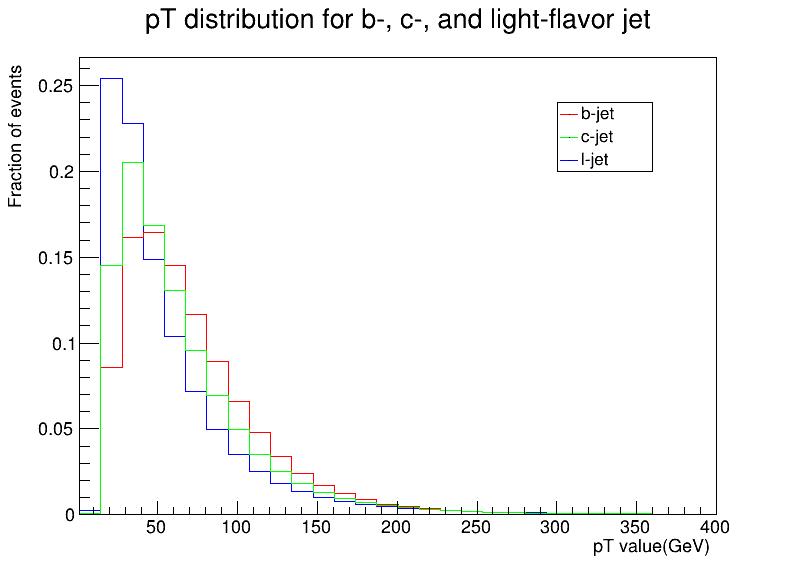

In [51]:
#Draw pT distribution for three jet

b_pT_plot = ROOT.TH1D("b-jet","pT distribution",30,1,4e2)
c_pT_plot = ROOT.TH1D("c-jet","pT distribution",30,1,4e2)
l_pT_plot = ROOT.TH1D("light-flavor jet","pT distribution",30,1,4e2)
#Set color for each jet event
b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

#Fill the data into histogram
bpt_len, cpt_len, lpt_len = b_pt.shape[0], c_pt.shape[0], l_pt.shape[0]

b_pT_plot.FillN(bpt_len, b_pt, 1/bpt_len*np.ones(bpt_len))
c_pT_plot.FillN(cpt_len, c_pt, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_pt, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("pT stack", "pT distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pT Canvas","pT distribution",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("pT value(GeV)")
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


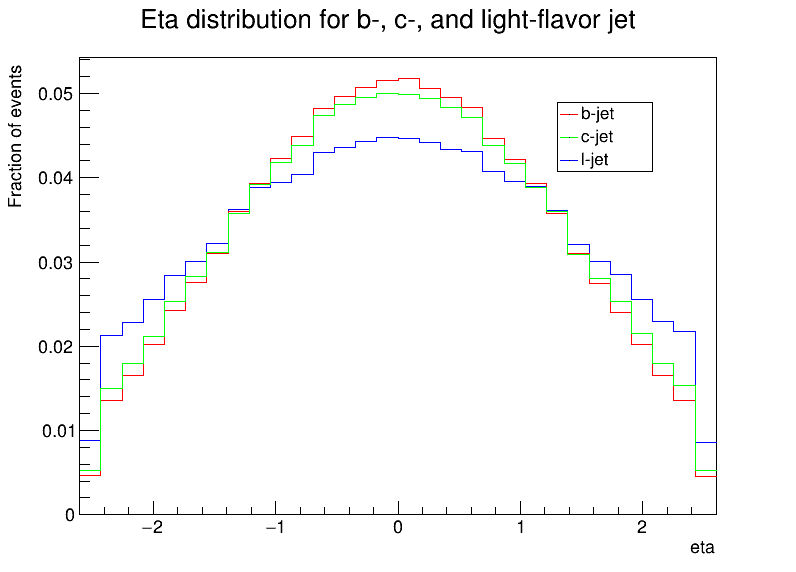

In [35]:
#Draw eta distribution for three jet
b_pT_plot = ROOT.TH1D("b-jet","eta distribution",30,-2.6,2.6)
c_pT_plot = ROOT.TH1D("c-jet","eta distribution",30,-2.6,2.6)
l_pT_plot = ROOT.TH1D("light-flavor jet","eta distribution",30,-2.6,2.6)

b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

b_pT_plot.FillN(bpt_len, b_eta, 1/bpt_len*np.ones(bpt_len))
c_pT_plot.FillN(cpt_len, c_eta, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_eta, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("stack", "Eta distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("eta canvas","Eta canvas",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("eta")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: eta canvas


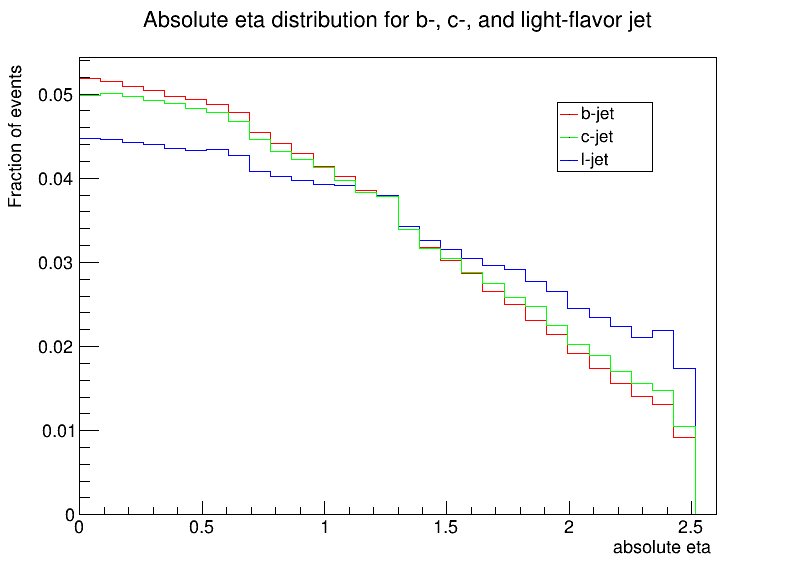

In [36]:
#Draw absolute eta distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","abseta distribution",30,0,2.6)
c_pT_plot = ROOT.TH1F("c-jet","abseta distribution",30,0,2.6)
l_pT_plot = ROOT.TH1F("light-flavor jet","abseta distribution",30,0,2.6)

b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

b_pT_plot.FillN(bpt_len, b_abs_eta, 1/bpt_len*np.ones(bpt_len))
c_pT_plot.FillN(cpt_len, c_abs_eta, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_abs_eta, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("stack", "Absolute eta distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("eta canvas","The Canvas Title",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("absolute eta")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

In [14]:
b_pb, c_pb, l_pb = concatenate_jets(5, "DL1r_pb"), concatenate_jets(4, "DL1r_pb"), concatenate_jets(0, "DL1r_pb")
b_pc, c_pc, l_pc = concatenate_jets(5, "DL1r_pc"), concatenate_jets(4, "DL1r_pc"), concatenate_jets(0, "DL1r_pc")
b_pu, c_pu, l_pu = concatenate_jets(5, "DL1r_pu"), concatenate_jets(4, "DL1r_pu"), concatenate_jets(0, "DL1r_pu")


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


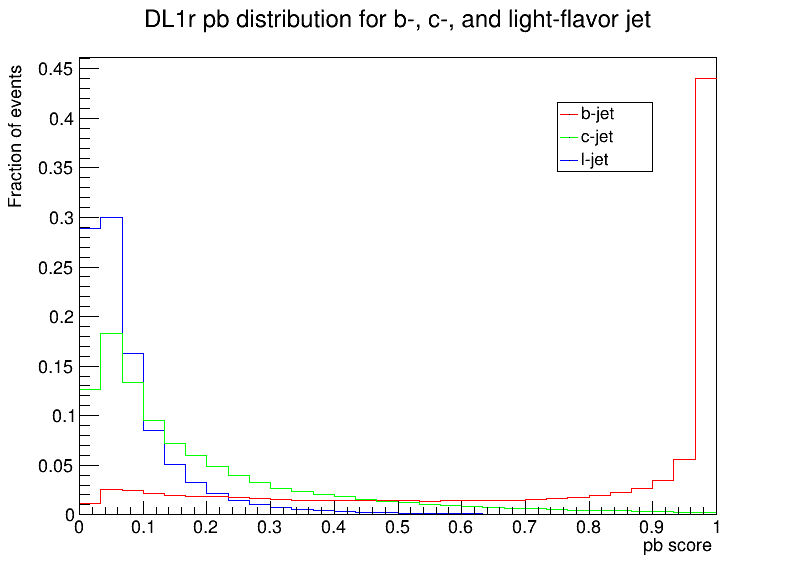

In [37]:
#Draw pc distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pb distribution",30,0,1)
c_pT_plot = ROOT.TH1F("c-jet","pb distribution",30,0,1)
l_pT_plot = ROOT.TH1F("light-flavor jet","pb distribution",30,0,1)

b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

b_pT_plot.FillN(bpt_len, b_pb, 1/bpt_len*np.ones(bpt_len)) #bpt_len is the size of b-jet data
c_pT_plot.FillN(cpt_len, c_pb, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_pb, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("pb stack", "DL1r pb distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pb","pb canvas",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("pb score")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: pc


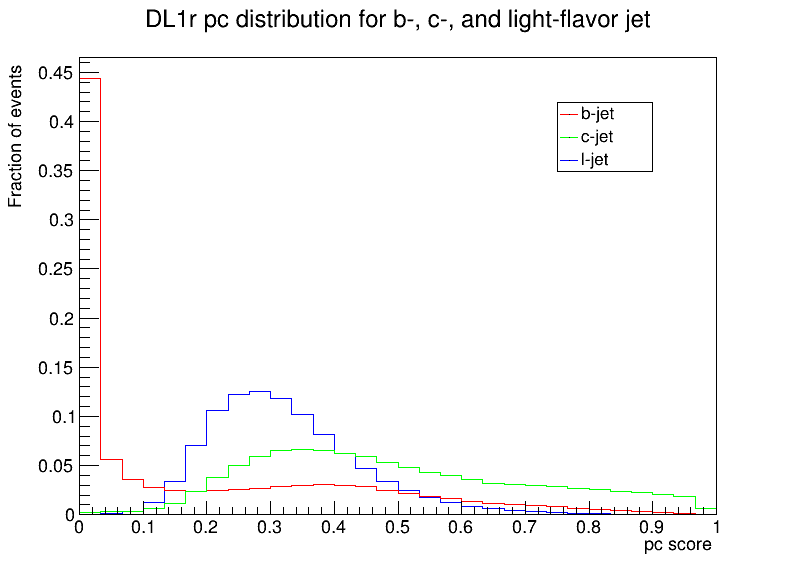

In [39]:
#Draw pc distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pc distribution",30,0,1)
c_pT_plot = ROOT.TH1F("c-jet","pc distribution",30,0,1)
l_pT_plot = ROOT.TH1F("light-flavor jet","pc distribution",30,0,1)

b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

b_pT_plot.FillN(bpt_len, b_pc, 1/bpt_len*np.ones(bpt_len))
c_pT_plot.FillN(cpt_len, c_pc, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_pc, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("pc stack", "DL1r pc distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pc","pc canvas",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("pc score")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: pu


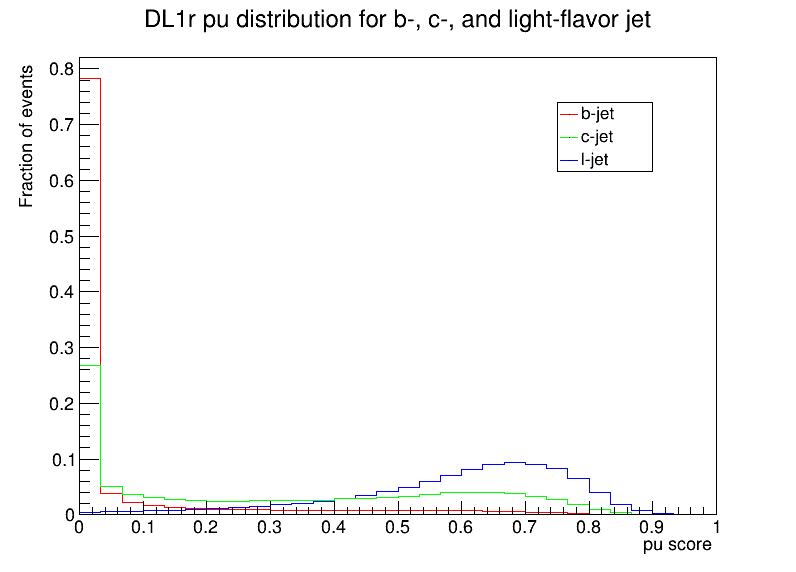

In [41]:
#Draw pc distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pu distribution",30,0,1)
c_pT_plot = ROOT.TH1F("c-jet","pu distribution",30,0,1)
l_pT_plot = ROOT.TH1F("light-flavor jet","pu distribution",30,0,1)

b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

b_pT_plot.FillN(bpt_len, b_pu, 1/bpt_len*np.ones(bpt_len))
c_pT_plot.FillN(cpt_len, c_pu, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_pu, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("pu stack", "DL1r pu distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pu","pu canvas",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("pu score")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

In [42]:
def tagging_discriminant(datapoint):
    return np.log(datapoint[0]/(0.018*datapoint[1]+0.982*datapoint[2]))
def concatenate_discriminant(label):
    concatenate_array = []
    label_name = label_dict[label]
    for file in files:
        dataset = file[f"{label_name}"].get(label_name)
        feature_values = dataset.fields(["DL1r_pb", "DL1r_pc", "DL1r_pu"])[:]
        pb, pc, pu = dataset.fields("DL1r_pb")[:], dataset.fields("DL1r_pc")[:], dataset.fields("DL1r_pu")[:]
        pb_ = np.reshape(pb, [pb.shape[0],1])
        pc_ = np.reshape(pc, [pc.shape[0],1])
        pu_ = np.reshape(pu, [pu.shape[0],1])
        hstack = np.hstack((pb_, pc_, pu_))
        tagging_discri = np.apply_along_axis(tagging_discriminant, 1, hstack)
        concatenate_array.append(tagging_discri)
    return np.concatenate(concatenate_array)

In [43]:
b_btag, c_btag, l_btag = concatenate_discriminant(5), concatenate_discriminant(4), concatenate_discriminant(0)

In [44]:
np.min(b_btag)

-9.180844762212342

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: pb


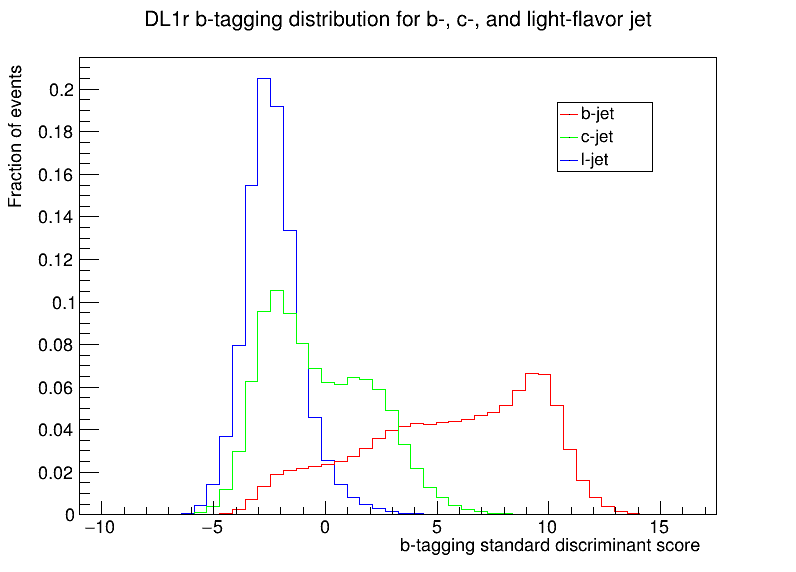

In [46]:
#Draw pT distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","b-taggin disriminant distribution",50,-11,17.5)
c_pT_plot = ROOT.TH1F("c-jet","b-tagging distribution",50,-11,17.5)
l_pT_plot = ROOT.TH1F("light-flavor jet","p-tagging distribution",50,-11,17.5)

b_pT_plot.SetLineColor(2)
c_pT_plot.SetLineColor(3)
l_pT_plot.SetLineColor(4)

b_pT_plot.FillN(bpt_len, b_btag, 1/bpt_len*np.ones(bpt_len))
c_pT_plot.FillN(cpt_len, c_btag, 1/cpt_len*np.ones(cpt_len))
l_pT_plot.FillN(lpt_len, l_btag, 1/lpt_len*np.ones(lpt_len))

stack = ROOT.THStack("b-tagging stack", "DL1r b-tagging distribution for b-, c-, and light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pb","The Canvas Title",800,600)
stack.Draw("nostack hist")
stack.GetYaxis().SetTitle("Fraction of events")
stack.GetXaxis().SetTitle("b-tagging standard discriminant score")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()